![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Mosaics using SIFT

* [Reference](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_08_features/sift.ipynb)

* [SIFT](https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83)

* [Homographies](https://stackoverflow.com/questions/13063201/how-to-show-the-whole-image-when-using-opencv-warpperspective)




# Install opencv for SIFT

In [ ]:
!pip install -U opencv-python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Left and right images

In [ ]:
!wget https://www.dropbox.com/s/d97ybiimrml1x9a/Rio_01.jpg
!wget https://www.dropbox.com/s/9hezbcinzuzokol/Rio_02.jpg
#!wget https://www.dropbox.com/s/tjpf7fni7dygeqr/Rio_03.jpg



--2023-08-29 14:36:26--  https://www.dropbox.com/s/d97ybiimrml1x9a/Rio_01.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/d97ybiimrml1x9a/Rio_01.jpg [following]
--2023-08-29 14:36:27--  https://www.dropbox.com/s/raw/d97ybiimrml1x9a/Rio_01.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce27962d466ed65b40ab217d8c0.dl.dropboxusercontent.com/cd/0/inline/CCsMgL9H3qa7uDzsQluXhBM8U5sngRcHfEQ7R9RG7TZC_ZIavaU8WugBWg3S2dGNjaSA5zKmATE3sxs5oDd0UsTY2YRNcuipuuXICviQa2QYE6ZQ1hldoe3olJAcFgKBS9o/file# [following]
--2023-08-29 14:36:27--  https://uce27962d466ed65b40ab217d8c0.dl.dropboxusercontent.com/cd/0/inline/CCsMgL9H3qa7uDzsQluXhBM8U5sngRcHfEQ7R9RG7TZC_ZIavaU8WugBWg3S2dGNjaSA5zKmATE3sxs5oDd0UsTY2YRNcuipuuXICviQa2QYE6ZQ1hldoe3olJAcFgKBS

In [ ]:
rgb_l = cv2.cvtColor(cv2.imread("Rio_01.jpg"), cv2.COLOR_BGR2RGB) # left image
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("Rio_02.jpg"), cv2.COLOR_BGR2RGB) # right image
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

# SIFT feature detection and description


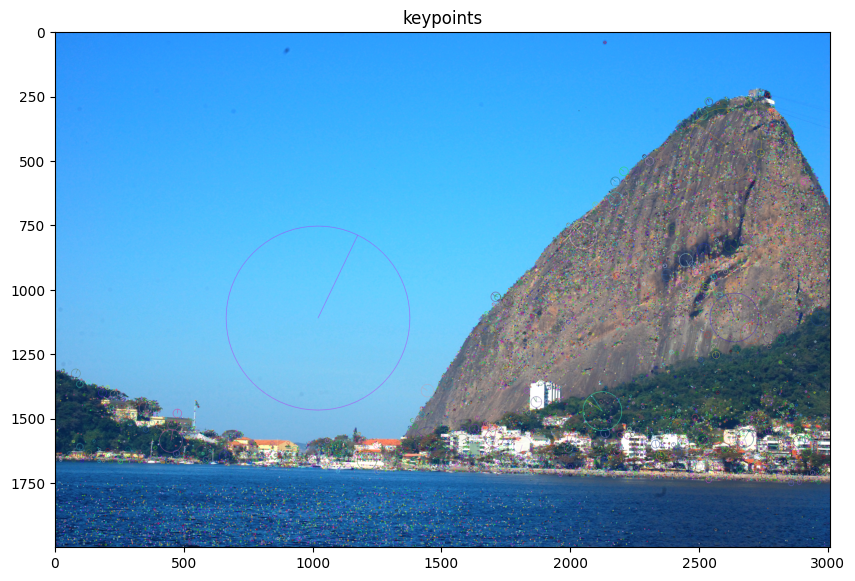

In [ ]:
feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,10))
plt.imshow(test)
plt.title("keypoints")
plt.show()



# Unique features


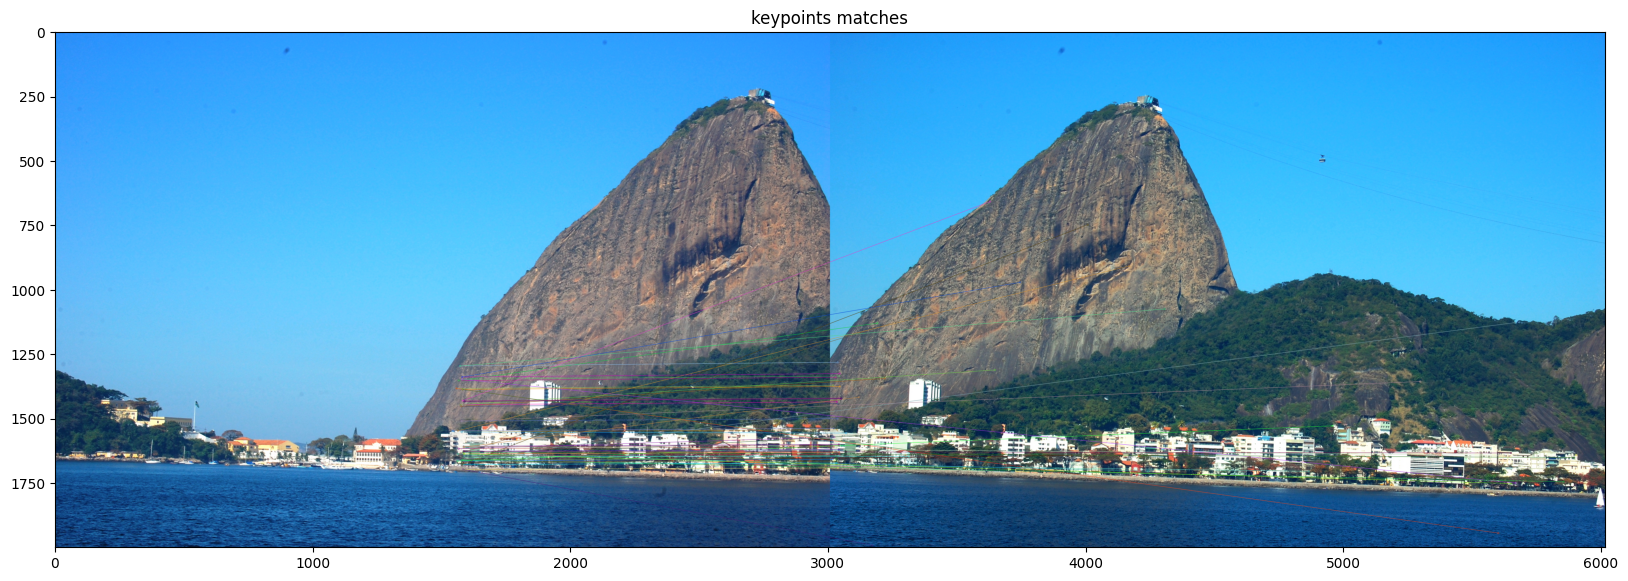

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_and_second_good_match_list.append(m)
good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_and_second_good_match_list[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()



# Homography between images


In [ ]:
good_kp_l = np.array([kp_l[m.queryIdx].pt for m in good_match_arr])
good_kp_r = np.array([kp_r[m.trainIdx].pt for m in good_match_arr])
H, masked = cv2.findHomography(good_kp_r, good_kp_l, cv2.RANSAC, 5.0)

print(H)


[[ 9.13365176e-01  2.83837289e-02  1.50613097e+03]
 [-5.84257145e-02  9.76719333e-01  4.36417754e+01]
 [-2.78912274e-05 -6.00085130e-07  1.00000000e+00]]


# Overlay images


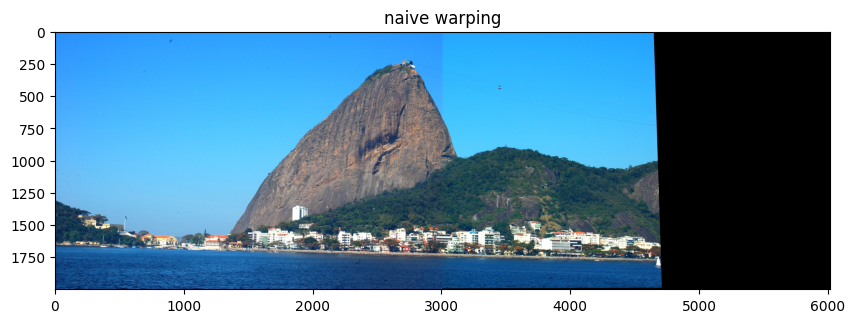

In [ ]:
rgb_r_warped = cv2.warpPerspective(rgb_r, H, (rgb_l.shape[1] + rgb_r.shape[1], rgb_l.shape[0]))
rgb_r_warped[0:rgb_l.shape[0], 0:rgb_l.shape[1]] = rgb_l

plt.figure(figsize=(10,10))
plt.imshow(rgb_r_warped)
plt.title("naive warping")
plt.show()


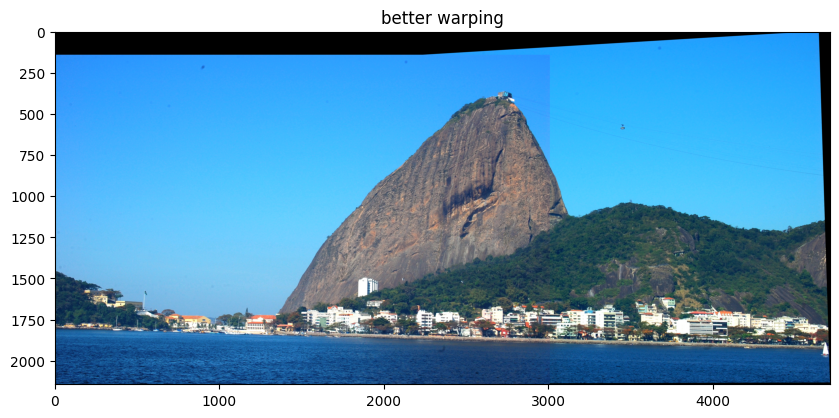

In [ ]:


def warpTwoImages(img1, img2, H):
    '''warp img2 to img1 with homograph H
    from: https://stackoverflow.com/questions/13063201/how-to-show-the-whole-image-when-using-opencv-warpperspective
    '''
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    pts2_ = cv2.perspectiveTransform(pts2, H)
    pts = np.concatenate((pts1, pts2_), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin, -ymin]
    Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])  # translate

    result = cv2.warpPerspective(img2, Ht@H, (xmax-xmin, ymax-ymin))
    result[t[1]:h1+t[1], t[0]:w1+t[0]] = img1
    return result


result = warpTwoImages(rgb_l, rgb_r, H)

plt.figure(figsize=(10,10))
plt.imshow(result)
plt.title("better warping")
plt.show()

